## Import Libraries

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import ast
from itertools import combinations
import random

In [2]:
# Set the path to the CSV file
csv_file_path = '../Dataset/TWOSIDES.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

/var/folders/pv/wpg0wtcs5kj1758khrqy155m0000gn/T/ipykernel_10744/1802199231.py:4: DtypeWarning: Columns (0,2,4,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


In [3]:
df.head()

,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
0,10355,Temazepam,136411,sildenafil,10003239,Arthralgia,7,149,24,1536,2.91667,0.421275,0.0448718
1,1808,Bumetanide,7824,Oxytocin,10003239,Arthralgia,1,13,2,138,5.0,1.19224,0.0714286
2,221147,POLYETHYLENE GLYCOL 3350,5521,Hydroxychloroquine,10003239,Arthralgia,6,103,20,1070,3.0,0.454505,0.0550459
3,10324,Tamoxifen,8640,Prednisone,10012735,Diarrhoea,18,123,35,1375,5.14286,0.276271,0.12766
4,10355,Temazepam,136411,sildenafil,10012735,Diarrhoea,2,154,37,1523,0.540541,0.721093,0.0128205


In [4]:
df.describe()

,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,A,B,C,D,PRR,PRR_error,mean_reporting_frequency
count,42920391,42920391,42920391,42920391,42920391,42920391,42920391,42920391,42920391,42920391,42920391.0,4.292039e+07,4.292039e+07
unique,1961,1716,2086,1842,17138,12726,1548,22813,5253,142302,91183.0,6.515420e+05,2.243100e+05
top,1191,Aspirin,10582,levothyroxine,10028813,Nausea,1,11,1,99,10.0,1.374770e+00,8.333330e-02
freq,859673,860674,597320,598041,163924,164167,21186431,202351,10026797,104115,9208100.0,8.305800e+04,2.117930e+05


In [5]:
# Basic Information
print("Dataset Info:\n")
print(df.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42920391 entries, 0 to 42920390
Data columns (total 13 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   drug_1_rxnorn_id          object
 1   drug_1_concept_name       object
 2   drug_2_rxnorm_id          object
 3   drug_2_concept_name       object
 4   condition_meddra_id       object
 5   condition_concept_name    object
 6   A                         object
 7   B                         object
 8   C                         object
 9   D                         object
 10  PRR                       object
 11  PRR_error                 object
 12  mean_reporting_frequency  object
dtypes: object(13)
memory usage: 4.2+ GB
None


In [6]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

drug_1_rxnorn_id            0
drug_1_concept_name         0
drug_2_rxnorm_id            0
drug_2_concept_name         0
condition_meddra_id         0
condition_concept_name      0
A                           0
B                           0
C                           0
D                           0
PRR                         0
PRR_error                   0
mean_reporting_frequency    0
dtype: int64


In [7]:
print("\nSummary Statistics:\n")
print(df.describe(include='all'))


Summary Statistics:

        drug_1_rxnorn_id drug_1_concept_name  drug_2_rxnorm_id  \
count           42920391            42920391          42920391   
unique              1961                1716              2086   
top                 1191             Aspirin             10582   
freq              859673              860674            597320   

       drug_2_concept_name  condition_meddra_id condition_concept_name  \
count             42920391             42920391               42920391   
unique                1842                17138                  12726   
top          levothyroxine             10028813                 Nausea   
freq                598041               163924                 164167   

               A         B         C         D         PRR     PRR_error  \
count   42920391  42920391  42920391  42920391  42920391.0  4.292039e+07   
unique      1548     22813      5253    142302     91183.0  6.515420e+05   
top            1        11         1        99  

In [8]:
# Check unique values per column
print("\nUnique Values per Column:\n")
print(df.nunique())


Unique Values per Column:

drug_1_rxnorn_id              1961
drug_1_concept_name           1716
drug_2_rxnorm_id              2086
drug_2_concept_name           1842
condition_meddra_id          17138
condition_concept_name       12726
A                             1548
B                            22813
C                             5253
D                           142302
PRR                          91183
PRR_error                   651542
mean_reporting_frequency    224310
dtype: int64



Top 10 Drug Interactions:
 Drug_Pair
Aspirin - Simvastatin        5700
Aspirin - Metoprolol         5625
Aspirin - Furosemide         5590
Aspirin - atorvastatin       5579
Aspirin - Omeprazole         5125
Folic Acid - Methotrexate    5120
Amlodipine - Aspirin         5117
Aspirin - Acetaminophen      5062
Aspirin - clopidogrel        5035
Aspirin - Lisinopril         5016
Name: count, dtype: int64


/var/folders/pv/wpg0wtcs5kj1758khrqy155m0000gn/T/ipykernel_10744/409848258.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_interactions.index, x=top_interactions.values, palette='viridis')


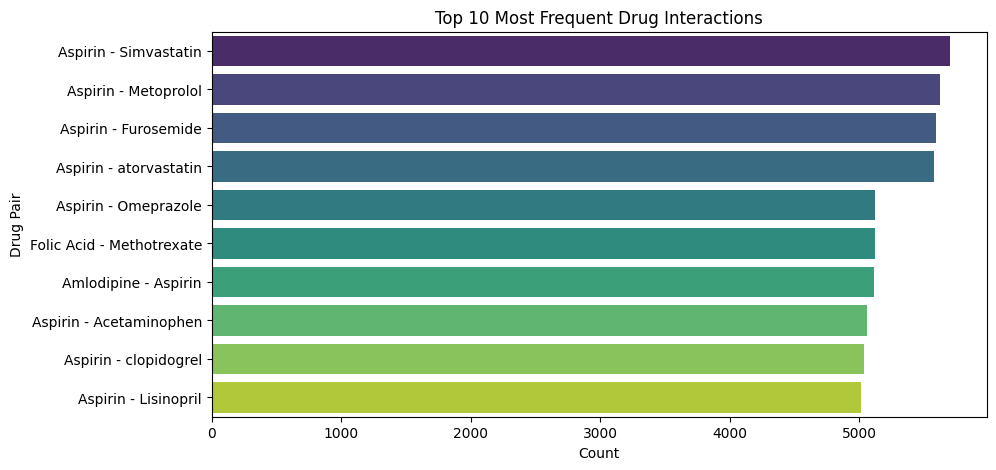


All cases where one drug is Aspirin and the other is Simvastatin:



In [9]:
if 'drug_1_concept_name' in df.columns and 'drug_2_concept_name' in df.columns:
    df['Drug_Pair'] = df['drug_1_concept_name'] + ' - ' + df['drug_2_concept_name']
    top_interactions = df['Drug_Pair'].value_counts().head(10)
    print("\nTop 10 Drug Interactions:\n", top_interactions)

    # Visualization
    plt.figure(figsize=(10, 5))
    sns.barplot(y=top_interactions.index, x=top_interactions.values, palette='viridis')
    plt.xlabel("Count")
    plt.ylabel("Drug Pair")
    plt.title("Top 10 Most Frequent Drug Interactions")
    plt.show()

    # Filter cases where one drug is Aspirin and the other is Simvastatin
    aspirin_simvastatin_df = df[((df['drug_1_concept_name'] == 'Aspirin') & (df['drug_2_concept_name'] == 'Simvastatin')) |
                                ((df['drug_1_concept_name'] == 'Simvastatin') & (df['drug_2_concept_name'] == 'Aspirin'))]
    print("\nAll cases where one drug is Aspirin and the other is Simvastatin:\n")
    

In [10]:
# Co-occurrence analysis: Finding drugs that frequently appear together
if 'drug_1_concept_name' in df.columns and 'drug_2_concept_name' in df.columns:
    co_occurrence = df.groupby(['drug_1_concept_name', 'drug_2_concept_name']).size().reset_index(name='Count')
    co_occurrence = co_occurrence.sort_values(by='Count', ascending=False).head(10)
    print("\nTop 10 Co-Occurring Drug Pairs:\n", co_occurrence)


Top 10 Co-Occurring Drug Pairs:
       drug_1_concept_name drug_2_concept_name  Count
10499             Aspirin         Simvastatin   5700
10297             Aspirin          Metoprolol   5625
10133             Aspirin          Furosemide   5590
10667             Aspirin        atorvastatin   5579
10357             Aspirin          Omeprazole   5125
58772          Folic Acid        Methotrexate   5120
6949           Amlodipine             Aspirin   5117
9793              Aspirin       Acetaminophen   5062
10743             Aspirin         clopidogrel   5035
10244             Aspirin          Lisinopril   5016


In [11]:
def deduplicate_drug_pairs_with_effects_simplified(df):
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Group by Drug_Pair and aggregate conditions into lists
    grouped = df_copy.groupby('Drug_Pair').agg({
        'drug_1_rxnorn_id': 'first',
        'drug_1_concept_name': 'first', 
        'drug_2_rxnorm_id': 'first',
        'drug_2_concept_name': 'first',
        'condition_meddra_id': lambda x: list(x),
        'condition_concept_name': lambda x: list(x)
    }).reset_index()
    
    
    # Create a new column with the count of effects for each drug pair
    grouped['effects_count'] = grouped['condition_concept_name'].apply(len)
    
    return grouped

In [12]:
result = deduplicate_drug_pairs_with_effects_simplified(df)

In [13]:
result

# Save the result to a CSV file
output_csv_path = '../Dataset/twosides_small.csv'
result.to_csv(output_csv_path, index=False)
print(f"Deduplicated data saved to {output_csv_path}")

Deduplicated data saved to ../Dataset/twosides_small.csv


In [14]:
df = result
df

,Drug_Pair,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,effects_count
0,6-Aminocaproic Acid - ANTI-INHIBITOR COAGULANT...,99,6-Aminocaproic Acid,314504,ANTI-INHIBITOR COAGULANT COMPLEX,"[10002034, 10017955, 10013709, 10038695, 10051...","[Anaemia, Gastrointestinal haemorrhage, Drug i...",5
1,6-Aminocaproic Acid - Acetaminophen,99,6-Aminocaproic Acid,161,Acetaminophen,"[10002034, 10052293, 10033661, 10023126, 10021...","[Anaemia, Haemorrhagic anaemia, Pancytopenia, ...",127
2,6-Aminocaproic Acid - Acyclovir,99,6-Aminocaproic Acid,281,Acyclovir,"[10062489, 10059034, 10043554, 10024384, 10029...","[Leukaemia recurrent, Acute myeloid leukaemia ...",74
3,"6-Aminocaproic Acid - Albumin Human, USP",99,6-Aminocaproic Acid,828529,"Albumin Human, USP","[10002034, 10023126, 10006093, 10003658, 10061...","[Anaemia, Jaundice, Bradycardia, Atrial fibril...",39
4,6-Aminocaproic Acid - Albuterol,99,6-Aminocaproic Acid,435,Albuterol,"[10002034, 10052293, 10000880, 10006093, 10003...","[Anaemia, Haemorrhagic anaemia, Acute myeloid ...",41
...,...,...,...,...,...,...,...,...
211985,zotepine - Estazolam,40003,zotepine,4077,Estazolam,"[10028596, 10003549, 10017577, 10013710, 10013...","[Myocardial infarction, Asthenia, Gait disturb...",20
211986,zotepine - Flunitrazepam,40003,zotepine,4460,Flunitrazepam,"[10002034, 10043071, 10040752, 10007515, 10007...","[Anaemia, Tachycardia, Sinus tachycardia, Card...",138
211987,zotepine - Magnesium Oxide,40003,zotepine,6582,Magnesium Oxide,"[10002034, 10013442, 10043071, 10007515, 10007...","[Anaemia, Disseminated intravascular coagulati...",72
211988,zotepine - Methotrimeprazine,40003,zotepine,6852,Methotrimeprazine,"[10002034, 10003673, 10007617, 10028596, 10007...","[Anaemia, Atrioventricular block complete, Car...",55


In [15]:
# === STEP 2: Get all unique drug RxNorm IDs ===
unique_drugs = set(df['drug_1_rxnorn_id']).union(set(df['drug_2_rxnorm_id']))
print(f"Unique drugs: {len(unique_drugs)}")

# === STEP 3: Generate all possible unordered drug pairs ===
all_possible_pairs = set(frozenset(pair) for pair in combinations(unique_drugs, 2))
print(f"All possible pairs: {len(all_possible_pairs)}")

# === STEP 4: Build set of positive (known interaction) pairs ===
positive_pairs = set(
    frozenset((row['drug_1_rxnorn_id'], row['drug_2_rxnorm_id']))
    for _, row in df.iterrows()
)
print(f"Positive pairs: {len(positive_pairs)}")

# === STEP 5: Create negative pairs by subtracting positive ones ===
negative_pairs = list(all_possible_pairs - positive_pairs)
print(f"Negative pairs: {len(negative_pairs)}")

# === STEP 6: Sample a balanced number of negatives ===
# You can change len(df) to len(df)*2 or any number for unbalanced dataset

num_to_sample = min(len(negative_pairs), len(df))
sampled_negative_pairs = random.sample(negative_pairs, num_to_sample)
print(f"Sampled negative pairs: {len(sampled_negative_pairs)}")


# === STEP 7: Convert to DataFrame ===
neg_df = pd.DataFrame(sampled_negative_pairs, columns=["drug_1_rxnorm_id", "drug_2_rxnorm_id"])

print("\nSampled negative pairs DataFrame:")

# === STEP 8: Placeholder columns for structure ===
neg_df['effects_count'] = 0
neg_df['condition_meddra_id'] = [[] for _ in range(len(neg_df))]
neg_df['condition_concept_name'] = [[] for _ in range(len(neg_df))]

print("Placeholder columns added:")

# === STEP 9: Build drug ID → concept name map from both columns ===
id_to_name = {}

# Add drug_1 mappings
for id_, name in zip(df['drug_1_rxnorn_id'], df['drug_1_concept_name']):
    if pd.notna(id_) and pd.notna(name):
        id_to_name[id_] = name

# Add drug_2 mappings
for id_, name in zip(df['drug_2_rxnorm_id'], df['drug_2_concept_name']):
    if pd.notna(id_) and pd.notna(name):
        id_to_name[id_] = name

# === STEP 10: Map names from ID ===
neg_df['drug_1_concept_name'] = neg_df['drug_1_rxnorm_id'].map(id_to_name)
neg_df['drug_2_concept_name'] = neg_df['drug_2_rxnorm_id'].map(id_to_name)

print("\nMapped drug names from IDs:")

# === STEP 11: Create Drug_Pair label ===
neg_df['Drug_Pair'] = neg_df['drug_1_concept_name'] + " - " + neg_df['drug_2_concept_name']

# === STEP 12: Print unmatched drugs (extra tip) ===
missing_1 = neg_df[neg_df['drug_1_concept_name'].isna()]['drug_1_rxnorm_id'].unique()
missing_2 = neg_df[neg_df['drug_2_concept_name'].isna()]['drug_2_rxnorm_id'].unique()

print(f"\nUnmatched drug_1_rxnorm_ids: {missing_1}")
print(f"Unmatched drug_2_rxnorm_ids: {missing_2}")

# === STEP 13: Optional — filter out rows with NaN names ===
neg_df = neg_df.dropna(subset=['drug_1_concept_name', 'drug_2_concept_name'])

# === STEP 14: Save to CSV ===
# neg_df.to_csv("twosides_negative_pairs.csv", index=False)
# print("\nSaved negative pairs to 'twosides_negative_pairs.csv'")


Unique drugs: 2357
All possible pairs: 2776546
Positive pairs: 211990
Negative pairs: 2564556
Sampled negative pairs: 211990

Sampled negative pairs DataFrame:
Placeholder columns added:

Mapped drug names from IDs:

Unmatched drug_1_rxnorm_ids: []
Unmatched drug_2_rxnorm_ids: []


In [16]:
neg_df

,drug_1_rxnorm_id,drug_2_rxnorm_id,effects_count,condition_meddra_id,condition_concept_name,drug_1_concept_name,drug_2_concept_name,Drug_Pair
0,1009,21247,0,[],[],Antithrombin III,clobutinol,Antithrombin III - clobutinol
1,314683,8308,0,[],[],"Insulin, Zinc, Human",Vitamin K 1,"Insulin, Zinc, Human - Vitamin K 1"
2,2184,33910,0,[],[],Cefoperazone,Isradipine,Cefoperazone - Isradipine
3,8987,3268,0,[],[],Pyrazinamide,Dexfenfluramine,Pyrazinamide - Dexfenfluramine
4,15657,19143,0,[],[],decitabine,Beta Carotene,decitabine - Beta Carotene
...,...,...,...,...,...,...,...,...
211985,8410,6852,0,[],[],alteplase,Methotrimeprazine,alteplase - Methotrimeprazine
211986,6984,732,0,[],[],Minoxidil,Amphotericin B,Minoxidil - Amphotericin B
211987,358274,11423,0,[],[],ambrisentan,Zinc Oxide,ambrisentan - Zinc Oxide
211988,10572,4127,0,[],[],thyroid (USP),Ethionamide,thyroid (USP) - Ethionamide


In [17]:
## Load the negative dataset
neg_df.head()
# === STEP 15: Combine positive and negative datasets and label of whether they are interacting or not ===
# Load positive dataset
pos_df = df
# Add a new column to indicate positive interactions
pos_df['Interaction'] = 1
# Add a new column to indicate negative interactions
neg_df['Interaction'] = 0
# Combine both datasets
combined_df = pd.concat([pos_df, neg_df], ignore_index=True)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset
combined_df.head()


,Drug_Pair,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,effects_count,Interaction,drug_1_rxnorm_id
0,Levofloxacin - distigmine,NaN,Levofloxacin,3551,distigmine,[],[],0,0,82122
1,pemetrexed - Dipyrone,68446,pemetrexed,3523,Dipyrone,"[10002034, 10024384, 10018687, 10029354, 10043...","[Anaemia, Leukopenia, Granulocytopenia, Neutro...",45,1,NaN
2,irbesartan - Clonazepam,83818,irbesartan,2598,Clonazepam,"[10022972, 10002034, 10052293, 10033661, 10019...","[Iron deficiency anaemia, Anaemia, Haemorrhagi...",670,1,NaN
3,C1 esterase inhibitor - Clenbuterol,NaN,C1 esterase inhibitor,2580,Clenbuterol,[],[],0,0,1599832
4,cortivazol - Oxacillin,NaN,cortivazol,7773,Oxacillin,[],[],0,0,21660


In [18]:
combined_df

,Drug_Pair,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,effects_count,Interaction,drug_1_rxnorm_id
0,Levofloxacin - distigmine,NaN,Levofloxacin,3551,distigmine,[],[],0,0,82122
1,pemetrexed - Dipyrone,68446,pemetrexed,3523,Dipyrone,"[10002034, 10024384, 10018687, 10029354, 10043...","[Anaemia, Leukopenia, Granulocytopenia, Neutro...",45,1,NaN
2,irbesartan - Clonazepam,83818,irbesartan,2598,Clonazepam,"[10022972, 10002034, 10052293, 10033661, 10019...","[Iron deficiency anaemia, Anaemia, Haemorrhagi...",670,1,NaN
3,C1 esterase inhibitor - Clenbuterol,NaN,C1 esterase inhibitor,2580,Clenbuterol,[],[],0,0,1599832
4,cortivazol - Oxacillin,NaN,cortivazol,7773,Oxacillin,[],[],0,0,21660
...,...,...,...,...,...,...,...,...,...,...
423975,tamsulosin - Iloprost,77492,tamsulosin,40138,Iloprost,"[10013573, 10033557, 10013968, 10008479, 10030...","[Dizziness, Palpitations, Dyspnoea, Chest pain...",24,1,NaN
423976,Vitamin K 2 - Fentanyl,42781,Vitamin K 2,4337,Fentanyl,"[10002034, 10009802, 10013442, 10023126, 10000...","[Anaemia, Coagulopathy, Disseminated intravasc...",161,1,NaN
423977,Busulfan - voriconazole,1828,Busulfan,121243,voriconazole,"[10002034, 10013442, 10061232, 10023126, 10000...","[Anaemia, Disseminated intravascular coagulati...",191,1,NaN
423978,aripiprazole - Sodium Bicarbonate,89013,aripiprazole,36676,Sodium Bicarbonate,"[10002034, 10013968, 10020993, 10012735, 10000...","[Anaemia, Dyspnoea, Hypoglycaemia, Diarrhoea, ...",28,1,NaN


In [19]:
## check the number of positive and negative samples
print("\nNumber of positive samples:", len(combined_df[combined_df['Interaction'] == 1]))
print("Number of negative samples:", len(combined_df[combined_df['Interaction'] == 0]))



Number of positive samples: 211990
Number of negative samples: 211990


In [20]:
combined_df.head()

,Drug_Pair,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,effects_count,Interaction,drug_1_rxnorm_id
0,Levofloxacin - distigmine,NaN,Levofloxacin,3551,distigmine,[],[],0,0,82122
1,pemetrexed - Dipyrone,68446,pemetrexed,3523,Dipyrone,"[10002034, 10024384, 10018687, 10029354, 10043...","[Anaemia, Leukopenia, Granulocytopenia, Neutro...",45,1,NaN
2,irbesartan - Clonazepam,83818,irbesartan,2598,Clonazepam,"[10022972, 10002034, 10052293, 10033661, 10019...","[Iron deficiency anaemia, Anaemia, Haemorrhagi...",670,1,NaN
3,C1 esterase inhibitor - Clenbuterol,NaN,C1 esterase inhibitor,2580,Clenbuterol,[],[],0,0,1599832
4,cortivazol - Oxacillin,NaN,cortivazol,7773,Oxacillin,[],[],0,0,21660


In [21]:
# model_path = "../Pipeline3/model/model.bin"

# # Load the model with memory mapping
# model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# print("Model loaded successfully!")

# word_vector = model['drugs']  

# ## Check all the Drugs in combined df that have embeddings
# drugs_with_embeddings = set(combined_df['drug_1_concept_name']).union(set(combined_df['drug_2_concept_name']))
# drugs_with_embeddings = [drug for drug in drugs_with_embeddings if drug in model.key_to_index]
# print(f"Number of drugs with embeddings: {len(drugs_with_embeddings)}")


# def filter_drugs_with_embeddings(df, model):
#     # Filter the DataFrame to include only rows where both drugs have embeddings
#     mask = df.apply(lambda row: row['drug_1_concept_name'] in model.key_to_index and row['drug_2_concept_name'] in model.key_to_index, axis=1)
#     return df[mask]
# filtered_combined_df = filter_drugs_with_embeddings(combined_df, model)
# print(f"Number of rows after filtering: {len(filtered_combined_df)}")
# filtered_combined_df.head()

# ## two the filtered dataset could you add a new column called "Drug_1_Embedding" and "Drug_2_Embedding" that contains the embeddings for each drug
# def add_embeddings_to_df(df, model):
#     # Create new columns for embeddings
#     df['Drug_1_Embedding'] = df['drug_1_concept_name'].apply(lambda x: model[x] if x in model.key_to_index else None)
#     df['Drug_2_Embedding'] = df['drug_2_concept_name'].apply(lambda x: model[x] if x in model.key_to_index else None)
#     return df
# filtered_combined_df = add_embeddings_to_df(filtered_combined_df, model)
# print(f"Embeddings added to DataFrame.")
# filtered_combined_df.head()

## Load templates

In [22]:
with open("Templates/interacting.txt", "r") as f:
    interaction_templates = [line.strip() for line in f.readlines()]

with open("Templates/non_interacting.txt", "r") as f:
    non_interaction_templates = [line.strip() for line in f.readlines()]

In [24]:
combined_df

,Drug_Pair,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,effects_count,Interaction,drug_1_rxnorm_id
0,Levofloxacin - distigmine,NaN,Levofloxacin,3551,distigmine,[],[],0,0,82122
1,pemetrexed - Dipyrone,68446,pemetrexed,3523,Dipyrone,"[10002034, 10024384, 10018687, 10029354, 10043...","[Anaemia, Leukopenia, Granulocytopenia, Neutro...",45,1,NaN
2,irbesartan - Clonazepam,83818,irbesartan,2598,Clonazepam,"[10022972, 10002034, 10052293, 10033661, 10019...","[Iron deficiency anaemia, Anaemia, Haemorrhagi...",670,1,NaN
3,C1 esterase inhibitor - Clenbuterol,NaN,C1 esterase inhibitor,2580,Clenbuterol,[],[],0,0,1599832
4,cortivazol - Oxacillin,NaN,cortivazol,7773,Oxacillin,[],[],0,0,21660
...,...,...,...,...,...,...,...,...,...,...
423975,tamsulosin - Iloprost,77492,tamsulosin,40138,Iloprost,"[10013573, 10033557, 10013968, 10008479, 10030...","[Dizziness, Palpitations, Dyspnoea, Chest pain...",24,1,NaN
423976,Vitamin K 2 - Fentanyl,42781,Vitamin K 2,4337,Fentanyl,"[10002034, 10009802, 10013442, 10023126, 10000...","[Anaemia, Coagulopathy, Disseminated intravasc...",161,1,NaN
423977,Busulfan - voriconazole,1828,Busulfan,121243,voriconazole,"[10002034, 10013442, 10061232, 10023126, 10000...","[Anaemia, Disseminated intravascular coagulati...",191,1,NaN
423978,aripiprazole - Sodium Bicarbonate,89013,aripiprazole,36676,Sodium Bicarbonate,"[10002034, 10013968, 10020993, 10012735, 10000...","[Anaemia, Dyspnoea, Hypoglycaemia, Diarrhoea, ...",28,1,NaN


## Generating Sentences

In [25]:
# Function to safely parse list strings
def parse_list_string(list_str):
    if isinstance(list_str, str):
        try:
            return ast.literal_eval(list_str)
        except (SyntaxError, ValueError):
            return []
    return []

# Function to generate sentences
def generate_sentences(row):
    # Fallback names if data is missing
    drug1 = str(row['drug_1_concept_name']) if pd.notna(row['drug_1_concept_name']) else "Drug 1"
    drug2 = str(row['drug_2_concept_name']) if pd.notna(row['drug_2_concept_name']) else "Drug 2"
    
    # Parse and check side effects
    side_effects = parse_list_string(row['condition_concept_name'])
    
    if len(side_effects) > 0:
        template = random.choice(interaction_templates)
        side_effect = random.choice(side_effects)
        sentence = template.format(drug1=drug1, drug2=drug2, side_effect=side_effect)
    else:
        template = random.choice(non_interaction_templates)
        sentence = template.format(drug1=drug1, drug2=drug2)
    
    return sentence

# Assuming combined_df is your DataFrame with the necessary columns
# combined_df = pd.read_csv("your_dataset.csv")  # Load your data if needed

combined_df['generated_sentence'] = combined_df.apply(generate_sentences, axis=1)

In [26]:
combined_df[['drug_1_concept_name', 'drug_2_concept_name', 'generated_sentence','Interaction']].head(10)

## Save the DataFrame to a CSV file
combined_df[['drug_1_concept_name', 'drug_2_concept_name', 'generated_sentence','Interaction']].to_csv("../Dataset/twosides_generated_sentences.csv", index=False)

In [27]:
combined_df 

,Drug_Pair,drug_1_rxnorn_id,drug_1_concept_name,drug_2_rxnorm_id,drug_2_concept_name,condition_meddra_id,condition_concept_name,effects_count,Interaction,drug_1_rxnorm_id,generated_sentence
0,Levofloxacin - distigmine,NaN,Levofloxacin,3551,distigmine,[],[],0,0,82122,Levofloxacin does not interact with distigmine...
1,pemetrexed - Dipyrone,68446,pemetrexed,3523,Dipyrone,"[10002034, 10024384, 10018687, 10029354, 10043...","[Anaemia, Leukopenia, Granulocytopenia, Neutro...",45,1,NaN,pemetrexed does not affect the biotransformati...
2,irbesartan - Clonazepam,83818,irbesartan,2598,Clonazepam,"[10022972, 10002034, 10052293, 10033661, 10019...","[Iron deficiency anaemia, Anaemia, Haemorrhagi...",670,1,NaN,Using irbesartan concurrently with Clonazepam ...
3,C1 esterase inhibitor - Clenbuterol,NaN,C1 esterase inhibitor,2580,Clenbuterol,[],[],0,0,1599832,C1 esterase inhibitor does not interfere with ...
4,cortivazol - Oxacillin,NaN,cortivazol,7773,Oxacillin,[],[],0,0,21660,Co-administration of cortivazol and Oxacillin ...
...,...,...,...,...,...,...,...,...,...,...,...
423975,tamsulosin - Iloprost,77492,tamsulosin,40138,Iloprost,"[10013573, 10033557, 10013968, 10008479, 10030...","[Dizziness, Palpitations, Dyspnoea, Chest pain...",24,1,NaN,tamsulosin and Iloprost together do not typica...
423976,Vitamin K 2 - Fentanyl,42781,Vitamin K 2,4337,Fentanyl,"[10002034, 10009802, 10013442, 10023126, 10000...","[Anaemia, Coagulopathy, Disseminated intravasc...",161,1,NaN,Vitamin K 2 does not modify the response to Fe...
423977,Busulfan - voriconazole,1828,Busulfan,121243,voriconazole,"[10002034, 10013442, 10061232, 10023126, 10000...","[Anaemia, Disseminated intravascular coagulati...",191,1,NaN,Busulfan and voriconazole do not cause metabol...
423978,aripiprazole - Sodium Bicarbonate,89013,aripiprazole,36676,Sodium Bicarbonate,"[10002034, 10013968, 10020993, 10012735, 10000...","[Anaemia, Dyspnoea, Hypoglycaemia, Diarrhoea, ...",28,1,NaN,aripiprazole does not augment the risk of adve...
